# Unsupervised learning - PCA and clustering example notebook

## Exploring the data

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
df = pd.read_csv("UsArrests.csv")
df.head()

,City,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


### Statistics

In [3]:
#To set the decimal precision:
pd.set_option('display.float_format', lambda x: '%.2f' % x) 

#The describe function give us insight into the statistical properties of the columns
stats = df.describe()
selected_stats = stats.loc[["mean","std","min","max"]].transpose() #select relevant rows
selected_stats

,mean,std,min,max
Murder,7.79,4.36,0.80,17.40
Assault,170.76,83.34,45.00,337.00
UrbanPop,65.54,14.47,32.00,91.00
Rape,21.23,9.37,7.30,46.00


#### The standard deviation for Murder and Rape are relatively high compared to their means, indicating that the values for these variables are spread out and there is a significant amount of variability.

#### On the other hand, the standard deviation for Assault and UrbanPop are relatively low compared to their means, indicating that the values for these variables are more concentrated and there is less variability.

#### The minimum and maximum values give an idea of the range of values for each variable. For example, the range of values for Murder is from 0.80 to 17.40, which is a significant difference. Similarly, the range of values for UrbanPop is from 32.00 to 91.00.

#### Based on the means, it can be concluded that the average number of assaults per 100,000 population is much higher compared to the average number of murders, rapes, or the percentage of the population living in urban areas.

### Check for missing values

In [4]:
missing = df.isnull().sum()
relevant_missing = pd.DataFrame(missing, columns=["missing"])
relevant_missing

,missing
City,0
Murder,0
Assault,0
UrbanPop,0
Rape,0


### We seem to have no missing values in out dataset

### Check for data types

In [6]:
# Examine types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   City      50 non-null     object 
 1   Murder    50 non-null     float64
 2   Assault   50 non-null     int64  
 3   UrbanPop  50 non-null     int64  
 4   Rape      50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


### To visualise the distribution of the observations for each feature, we plot a histogram using Pandas's ```.hist()``` function:

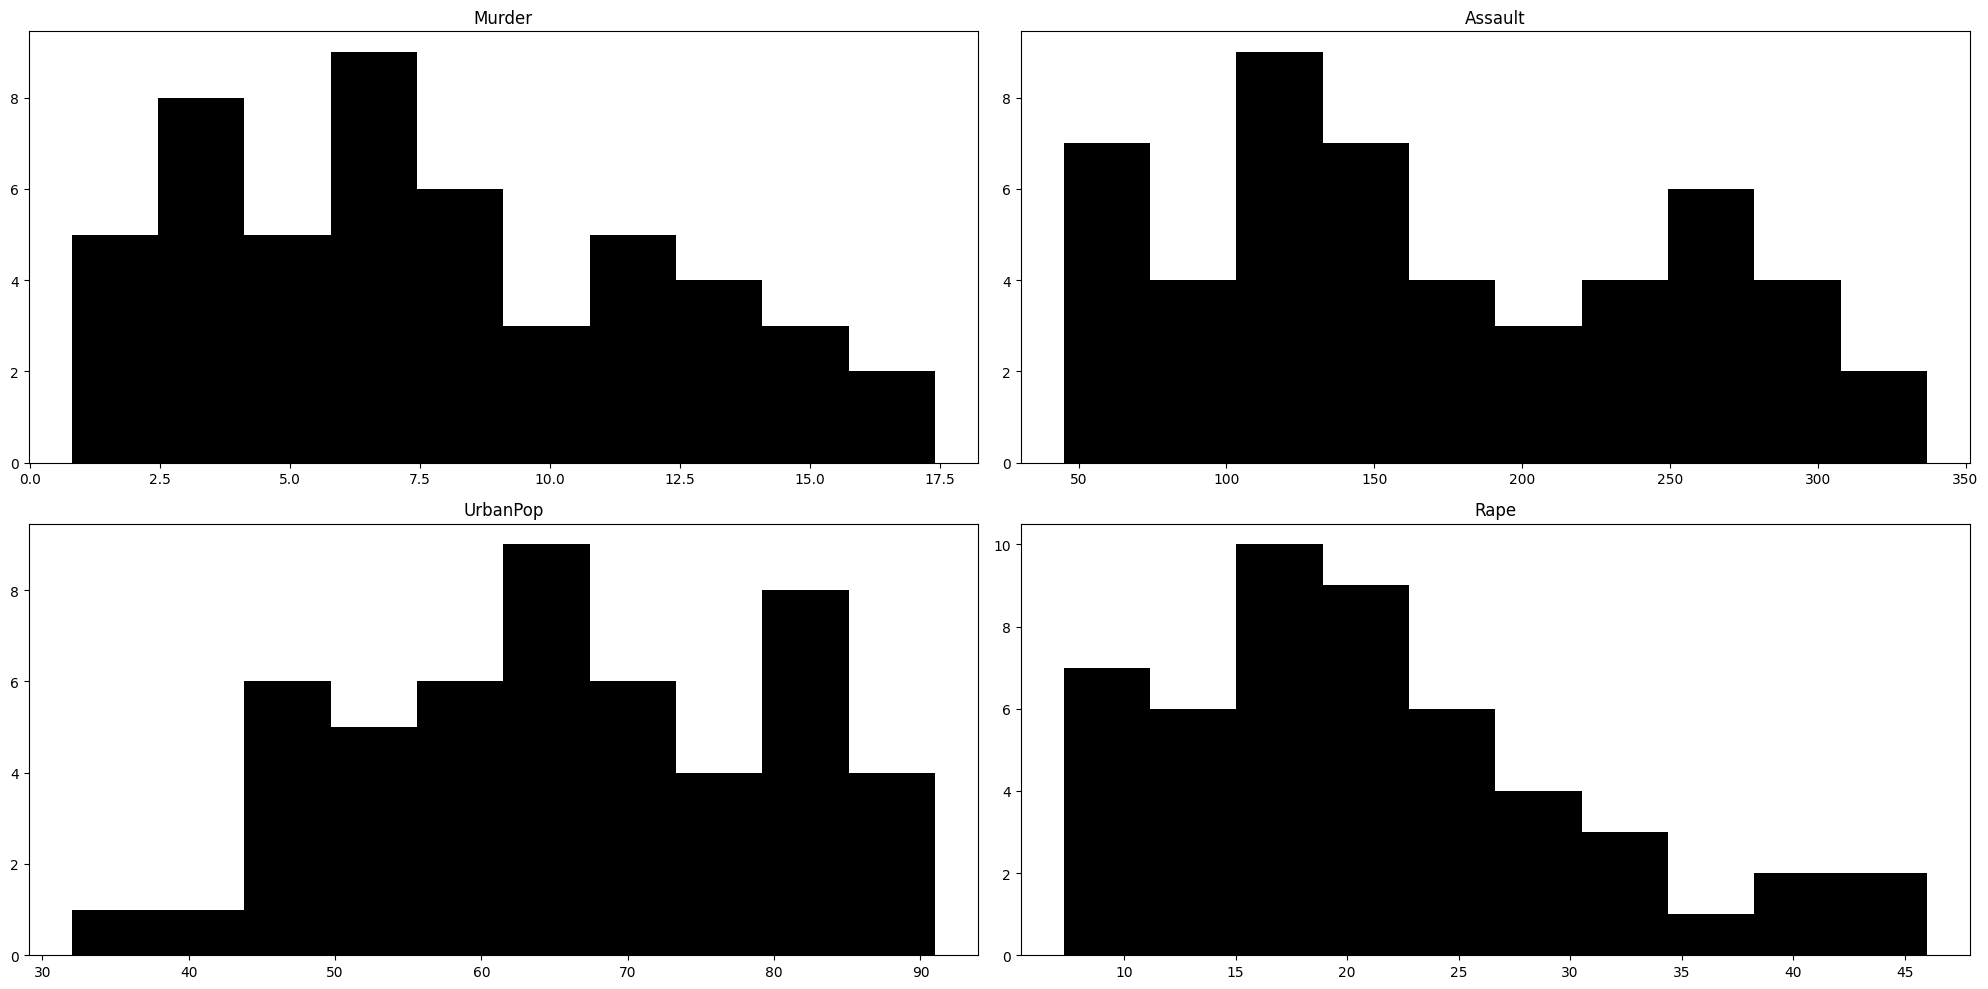

In [7]:
# Plot histograms
histograms = df.hist(color='black', grid=False, figsize=(20, 10)) #This can also be done for each column individually by calling hist on that column
plt.tight_layout()
plt.show()

#### By analyzing the histograms of the USArrests dataset, we can make the following observations:

##### Murder: The histogram shows that the majority of states have a low number of murders per 100,000 population, with a few states having a higher number of murders. This indicates that the distribution of murders is skewed towards the lower end.

##### Assault: The histogram shows that the majority of states have a moderate number of assaults per 100,000 population, with some states having a higher number of assaults and some having a lower number. This indicates that the distribution of assaults is roughly symmetrical.

#### UrbanPop: The histogram shows that the majority of states have a moderate to high percentage of the population living in urban areas, with a few states having a lower percentage. This indicates that the distribution of urban population is skewed towards the higher end.

#### Rape: The histogram shows that the majority of states have a low to moderate number of rapes per 100,000 population, with some states having a higher number of rapes. This indicates that the distribution of rapes is roughly symmetrical.

In [26]:
# Create summary table
frames = [relevant_missing,selected_stats]
summary = pd.concat(frames, axis=1)
summary.rename(columns = {0:"missing"}, inplace = True)
summary.to_csv('summary.csv', index=True) 
summary

,missing,mean,std,min,max
City,0,NaN,NaN,NaN,NaN
Murder,0,7.79,4.36,0.80,17.40
Assault,0,170.76,83.34,45.00,337.00
UrbanPop,0,65.54,14.47,32.00,91.00
Rape,0,21.23,9.37,7.30,46.00


## Correlation Analysis

C:\Users\Farha\AppData\Local\Temp\ipykernel_25672\1301948103.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


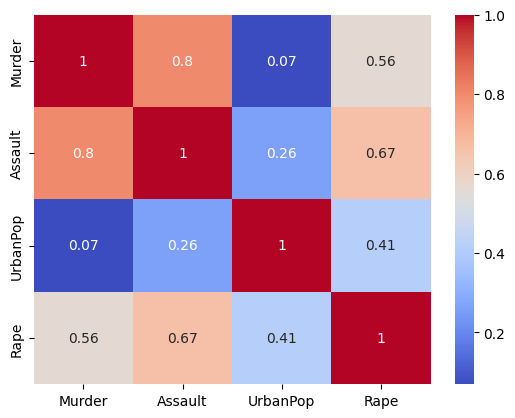

In [66]:
corr = df.corr()
sns.heatmap(corr, annot=True, cmap = 'coolwarm')
plt.show()

### A correlation analysis can reveal the strength and direction of the relationships between the variables. The strength of the relationship is indicated by the magnitude of the correlation coefficient, which ranges from -1 to 1. A correlation coefficient close to 1 indicates a strong positive relationship between the variables, meaning that as one variable increases, the other variable also increases. A correlation coefficient close to -1 indicates a strong negative relationship between the variables, meaning that as one variable increases, the other variable decreases. A correlation coefficient close to 0 indicates a weak or no relationship between the variables.

<AxesSubplot: >

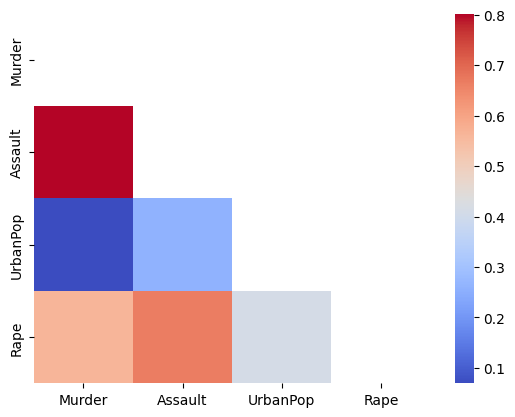

In [69]:
countries = df.index
corr_df = df.drop(["City"],axis=1).corr()
labels =corr_df.columns

correlations = corr_df.corr()
import seaborn as sns
mask_ut = np.triu(np.ones(corr_df.shape)).astype(np.bool_)
sns.heatmap(corr_df, mask=mask_ut, cmap="coolwarm")

#### Murder and Assault: The correlation coefficient between Murder and Assault is high and positive, indicating a strong positive relationship between the two variables. This means that states with a high number of murders also tend to have a high number of assaults.

#### Murder and UrbanPop: The correlation coefficient between Murder and UrbanPop is low and negative, indicating a weak negative relationship between the two variables. This means that states with a high number of murders tend to have a lower percentage of the population living in urban areas.

#### Murder and Rape: The correlation coefficient between Murder and Rape is moderate and positive, indicating a moderate positive relationship between the two variables. This means that states with a high number of murders tend to also have a high number of rapes.

#### Assault and UrbanPop: The correlation coefficient between Assault and UrbanPop is low and positive, indicating a weak positive relationship between the two variables. This means that states with a high number of assaults tend to have a higher percentage of the population living in urban areas.

#### Assault and Rape: The correlation coefficient between Assault and Rape is moderate and positive, indicating a moderate positive relationship between the two variables. This means that states with a high number of assaults tend to also have a high number of rapes.

#### UrbanPop and Rape: The correlation coefficient between UrbanPop and Rape is low and positive, indicating a weak positive relationship between the two variables. This means that states with a higher percentage of the population living in urban areas tend to also have a higher number of rapes.



## PCA

In [33]:
from sklearn.decomposition import PCA #run again if it does not converge the first time

np.set_printoptions(precision=2)

X = df.drop(["City"],axis=1).values.squeeze()

pca = PCA()

X_trans = pca.fit_transform(X)

df_pca = pd.DataFrame(X_trans)
df_pca.head()

,0,1,2,3
0,64.80,11.45,-2.49,2.41
1,92.83,17.98,20.13,-4.09
2,124.07,-8.83,-1.69,-4.35
3,18.34,16.70,0.21,-0.52
4,107.42,-22.52,6.75,-2.81


In [38]:
std = df_pca.describe().transpose()["std"]
print(f"Standard deviation: {std.values,}")

Standard deviation: (array([83.73, 14.21,  6.49,  2.48]),)


#### Based on these standard deviation results, we can make the following observations:

#### The standard deviation of the variable Assault is the largest (83.73), indicating that the values for this variable are more spread out than the values for the other variables.

#### The standard deviation of the variable Rape is the smallest (2.48), indicating that the values for this variable are more clustered around the mean than the values for the other variables.

#### The standard deviation of the variable Murder is moderate (83.73), while the standard deviation of the variable UrbanPop is also moderate (14.21). This indicates that the values for these two variables are neither very spread out nor very clustered around the mean.

In [39]:
print(f"Proportion of Variance Explained: {pca.explained_variance_ratio_}")

Proportion of Variance Explained: [9.66e-01 2.78e-02 5.80e-03 8.49e-04]


#### The first value (9.66e-01) indicates that a large proportion of the variance in the USArrests dataset (96.6%) can be explained by the first variable, Murder.

#### The second and third values (2.78e-02 and 5.80e-03) indicate that a smaller proportion of the variance in the USArrests dataset can be explained by the second and third variables, Assault and UrbanPop, respectively.

#### The fourth value (8.49e-04) indicates that an even smaller proportion of the variance in the USArrests dataset can be explained by the fourth variable, Rape.

In [40]:
print(f"Cumulative Proportion: {np.cumsum(pca.explained_variance_)}")

Cumulative Proportion: [7011.11 7213.11 7255.22 7261.38]


The first value (7011.11) represents the amount of variance in the USArrests dataset that can be explained by the first variable. The second value (7213.11) represents the total amount of variance that can be explained by the first two variables, and so on.

In [42]:
Cities = df.index
corr_df = df.drop(["City"],axis=1).corr()
labels =corr_df.columns

correlations = corr_df.corr()
def biplot(score,coeff,labels=None,points=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())

    fig, ax = plt.subplots()    

    ax.scatter(xs * scalex,ys * scaley,s=5)

    for i in range(0,len(xs)):
        txt = Cities[i]
        ax.annotate(txt, (xs[i]* scalex, ys[i]* scaley))

    for i in range(n):
        ax.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            ax.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'green', ha = 'center', va = 'center')
        else:
            ax.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
 
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.grid()

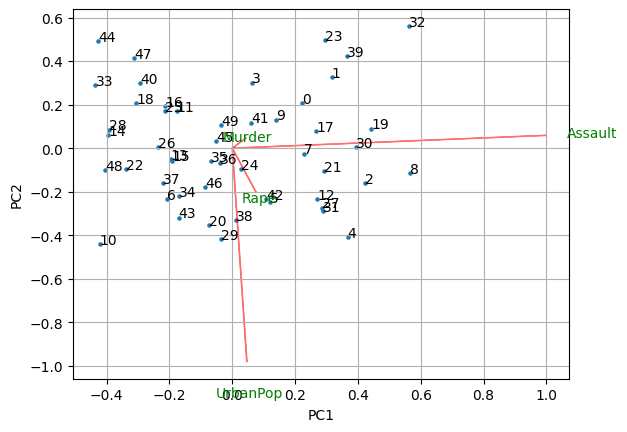

In [44]:
biplot(X_trans[:,0:2],np.transpose(pca.components_[0:2, :]),list(labels),list(Cities))
plt.show()

##### Each point on a biplot is the projected observation, transformed from the original data. The importance of each feature is indicated by the length of the arrows on the biplot. This corresponds to the magnitude of the values in the eigenvectors. From this biplot, we see that Assault and the Urban Pop are the most important featuresas the arrows to each of these dominate the biplot.

##### This information can also be quantified as follows:

In [45]:
# Feature importance
pd.set_option('display.float_format', lambda x: '%.3f' % x) #change precision to see more decimal places

pc1 = abs( pca.components_[0] ) #components x features - access at index 0 to get the first component
pc2 = abs( pca.components_[1] )

feat_df = pd.DataFrame()
feat_df["Features"] = list(labels)
feat_df["PC1 Importance"] = pc1
feat_df["PC2 Importance"] = pc2
feat_df

,Features,PC1 Importance,PC2 Importance
0,Murder,0.042,0.045
1,Assault,0.995,0.059
2,UrbanPop,0.046,0.977
3,Rape,0.075,0.201


#### Feature "Assault" has a PC1 Importance of 0.995, indicating that it is a significant contributor to the formation of PC1. Conversely, feature "Rape" has a PC2 Importance of only 0.201, indicating that it has a relatively low contribution to the formation of PC2.

### Standardised data

In [46]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

std_pca = PCA()
X_std_trans = std_pca.fit_transform(X_std)

df_std_pca = pd.DataFrame(X_std_trans)
df_std_pca.head()

,0,1,2,3
0,0.986,1.133,-0.444,0.156
1,1.950,1.073,2.040,-0.439
2,1.763,-0.746,0.055,-0.835
3,-0.141,1.120,0.115,-0.183
4,2.524,-1.543,0.599,-0.342


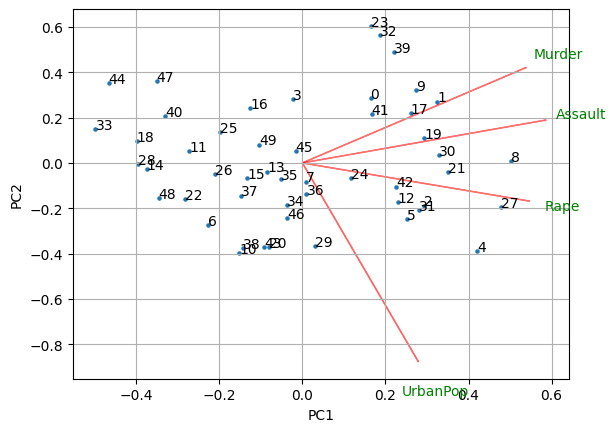

In [47]:
biplot(X_std_trans[:,0:2],np.transpose(std_pca.components_[0:2, :]),list(labels))
plt.show()

### We see that the standardised data results in far more variables being utilised to explain the variance, as the large numbers no longer dominate it. We also see that the the different features cluster together in groups.

In [48]:
# Feature importance

pc1 = abs( std_pca.components_[0] ) #components x features - access at index 0 to get the first component
pc2 = abs( std_pca.components_[1] )

feat_df = pd.DataFrame()
feat_df["Features"] = list(labels)
feat_df["PC1 Importance"] = pc1
feat_df["PC2 Importance"] = pc2
feat_df

,Features,PC1 Importance,PC2 Importance
0,Murder,0.536,0.418
1,Assault,0.583,0.188
2,UrbanPop,0.278,0.873
3,Rape,0.543,0.167


#### Inspecting the feature importance now, we see that most of the variables contribute fairly evenly, with only some with low importance.

Text(0.5, 1.0, 'Cumulative Explained Variance')

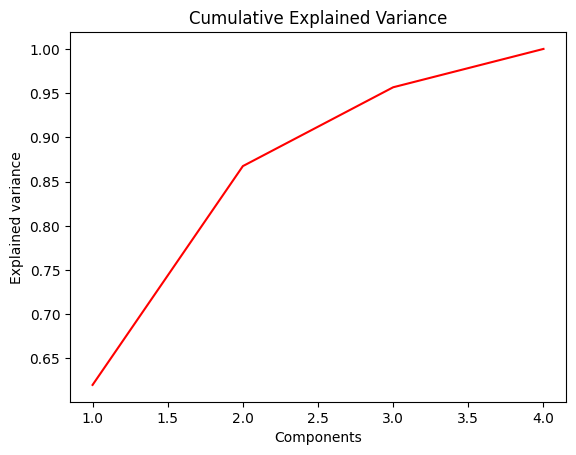

In [49]:
# Cumulative variance plot
plt.ylabel('Explained variance')
plt.xlabel('Components')
plt.plot(range(1,len(std_pca.explained_variance_ratio_ )+1),
         np.cumsum(std_pca.explained_variance_ratio_),
         c='red')
plt.title("Cumulative Explained Variance")

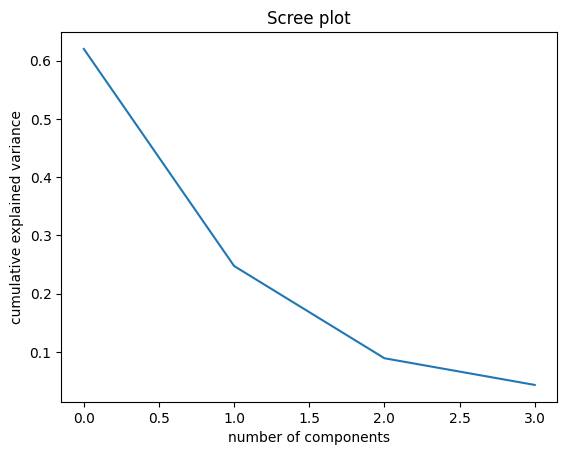

In [50]:
# Scree plot
plt.plot(std_pca.explained_variance_ratio_)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.title("Scree plot")
plt.show()

The first 2 principal components together explain around 90% of the variance. We can therefore use them to perform cluster analysis. This is what we refer to as dimensionality reduction. We began with 4 variables and now we have 2 variables explaining most of the variability.

In [53]:
pca_df = pd.DataFrame(X_std_trans[:,0:5], index = df['City'])
pca_df.head()

,0,1,2,3
City,,,,
Alabama,0.986,1.133,-0.444,0.156
Alaska,1.950,1.073,2.040,-0.439
Arizona,1.763,-0.746,0.055,-0.835
Arkansas,-0.141,1.120,0.115,-0.183
California,2.524,-1.543,0.599,-0.342


## Hierarchical clustering

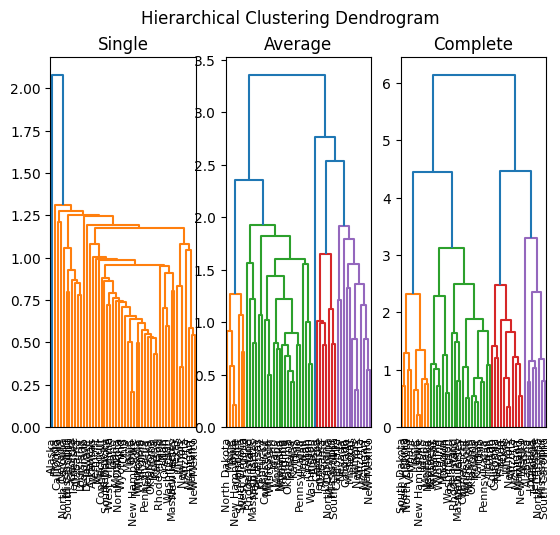

In [54]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
model = model.fit(pca_df)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
fig.suptitle('Hierarchical Clustering Dendrogram')
ax1.set_title("Single")
dendrogram(linkage(pca_df, method='single'), labels=pca_df.index, ax=ax1) #change method: eg. single, average, complete...
ax2.set_title("Average")
dendrogram(linkage(pca_df, method='average'), labels=pca_df.index, ax=ax2)
ax3.set_title("Complete")
dendrogram(linkage(pca_df, method='complete'), labels=pca_df.index, ax=ax3)
plt.show()

### The dendrogram can be interpreted by examining the height of the branches and the arrangement of the leaves. The height of the branches represents the dissimilarity between the two groups of observations being merged, while the arrangement of the leaves reflects the similarities between the observations.

### We look for the largest distance that we can vertically without crossing any horizontal line and this one is the red framed line on the above diagram. Let’s count the number of lines on the diagram and determine the optimal number of clusters. Cluster number will be 3 for this dataset.

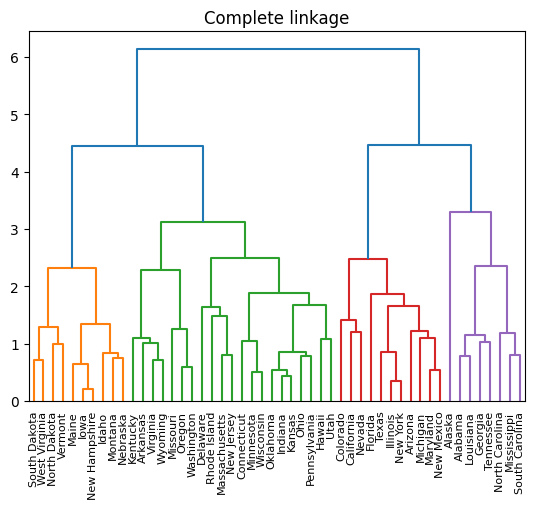

In [55]:
plt.title("Complete linkage")
dendrogram(linkage(pca_df, method='complete'), labels=pca_df.index)
plt.show()

### The distance between 2 clusters is defined as the maximum distance between any 2 points in the clusters

### K-means clustering

K-means is a very popular clustering partitioning algorithm that is fast and efficient and scales well for large datasets. It is an iterative process, so observations can switch between clusters while the algorithm runs until it converges at a local optimum. This method is not robust when it comes to noise data and outliers and is not suitable for clusters with non-convex shapes. Another drawback with K-means is the necessity of specifying K in advance.

For our analysis, it seems that the shape of clusters is likely to be regular based on the PCA biplot. K will be set to 3. A visualisation of the clusters is shown in the figure below.


c:\Users\Farha\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


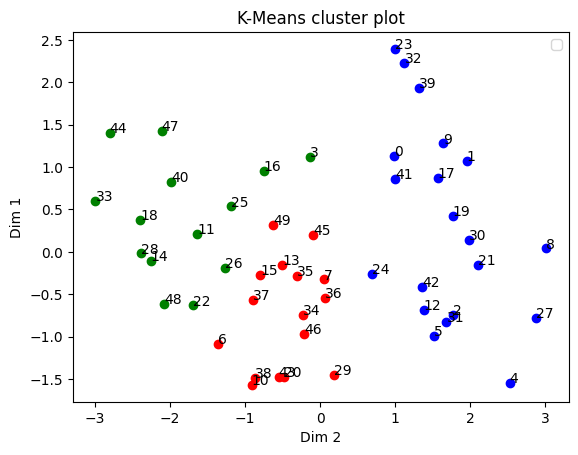

In [57]:
from sklearn.cluster import KMeans

# We extract the first two components
x = X_std_trans[:,0]
y = X_std_trans[:,1]

# Fit k-means
k=3
kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
cluster_labels = kmeans.fit_predict(pca_df)
cent = kmeans.cluster_centers_

# Plot clusters
fig, ax = plt.subplots()
colours = 'rbgy'
for i in range(0,k):
    ax.scatter(x[cluster_labels == i],y[cluster_labels == i],c = colours[i]) 

for i in range(0,len(x)):
        txt = Cities[i]
        ax.annotate(txt, (x[i], y[i]))
ax.set_title("K-Means cluster plot")
ax.set_xlabel("Dim 2")
ax.set_ylabel("Dim 1")
ax.legend()

In [60]:
# Groups - translate to readable names
clusters = pd.DataFrame()

group0_indices = np.argwhere(cluster_labels==0).transpose()[0]
group1_indices = np.argwhere(cluster_labels==1).transpose()[0]
group2_indices = np.argwhere(cluster_labels==2).transpose()[0]

group0 = np.array(Cities)[group0_indices]
group1 = np.array(Cities)[group1_indices]
group2 = np.array(Cities)[group2_indices]


print("Group 0: {}\n\n".format([df.loc[x]["City"] for x in group0]))
print("Group 1: {}\n\n".format([df.loc[x]["City"] for x in group1]))
print("Group 2: {}\n\n".format([df.loc[x]["City"] for x in group2]))

Group 0: ['Connecticut', 'Delaware', 'Hawaii', 'Indiana', 'Kansas', 'Massachusetts', 'New Jersey', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'Utah', 'Virginia', 'Washington', 'Wyoming']


Group 1: ['Alabama', 'Alaska', 'Arizona', 'California', 'Colorado', 'Florida', 'Georgia', 'Illinois', 'Louisiana', 'Maryland', 'Michigan', 'Mississippi', 'Missouri', 'Nevada', 'New Mexico', 'New York', 'North Carolina', 'South Carolina', 'Tennessee', 'Texas']


Group 2: ['Arkansas', 'Idaho', 'Iowa', 'Kentucky', 'Maine', 'Minnesota', 'Montana', 'Nebraska', 'New Hampshire', 'North Dakota', 'South Dakota', 'Vermont', 'West Virginia', 'Wisconsin']




## Observations:

### The Cities in the Cluster-0 seems to be Safe-Zone where there are relativley less Murders,Assaults and Rapes.
### The Cities in Cluster-1 seems to have higher crime rates and can be regarded as Danger-Zone.
### The Cities in Cluster-2 seems to have moderate crime rates when compared to other zones and can be called as Moderate-Zone